In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() 

import numpy as np


In [2]:
# import csv
df = pd.read_csv("C:/Users/nick_/_WGU/D207/Jupyter Notebook/churn_clean.csv", index_col=0)

In [3]:
# set notebook up to display all col names
pd.set_option('display.max_columns', None) 

In [4]:
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
original_dataset_cols_set = set(df.columns.tolist()) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [7]:
df.duplicated().value_counts() # confirms no duplicate rows in df

False    10000
Name: count, dtype: int64

In [8]:
len(df)-len(df.drop_duplicates())

0

In [9]:
# identify all quantitative columns for purposes of working with data therein later on

# done manually on my part
quant_cols = [
    "Population", 
    "Children", 
    "Age", 
    "Income", 
    "Outage_sec_perweek",
    "Email",
    "Contacts",
    "Yearly_equip_failure",
    "Tenure",
    "MonthlyCharge",
    "Bandwidth_GB_Year"
]

quant_cols

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [10]:
# exclude from cleaning per assignment instructions, and therefore from re-encoding
exclude_from_cleaning = [
    "UID",
    "CaseOrder", 
    "Customer_id",
    "Interaction", 
    "City",
    "State", 
    "County", 
    "Zip", 
    "Lat",
    "Lng",
]

# manually excluding "Job" as well due to length of out results
# will evaluate "Job" separately directly below other fields
exclude_from_cleaning.append("Job")

exclude_from_cleaning

['UID',
 'CaseOrder',
 'Customer_id',
 'Interaction',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Job']

In [11]:
qual_cols_dict = dict() 

for c in df.columns:
    if c not in exclude_from_cleaning:
        if c not in quant_cols:
            qual_cols_dict[c] = df[c].unique().tolist()
        else:
            continue
            
# all qualitative values besides "Job"
qual_cols_dict

{'Area': ['Urban', 'Suburban', 'Rural'],
 'TimeZone': ['America/Sitka',
  'America/Detroit',
  'America/Los_Angeles',
  'America/Chicago',
  'America/New_York',
  'America/Puerto_Rico',
  'America/Denver',
  'America/Menominee',
  'America/Phoenix',
  'America/Indiana/Indianapolis',
  'America/Boise',
  'America/Kentucky/Louisville',
  'Pacific/Honolulu',
  'America/Indiana/Petersburg',
  'America/Nome',
  'America/Anchorage',
  'America/Indiana/Knox',
  'America/Juneau',
  'America/Toronto',
  'America/Indiana/Winamac',
  'America/Indiana/Vincennes',
  'America/North_Dakota/New_Salem',
  'America/Indiana/Tell_City',
  'America/Indiana/Marengo',
  'America/Ojinaga'],
 'Marital': ['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
 'Gender': ['Male', 'Female', 'Nonbinary'],
 'Churn': ['No', 'Yes'],
 'Techie': ['No', 'Yes'],
 'Contract': ['One year', 'Month-to-month', 'Two Year'],
 'Port_modem': ['Yes', 'No'],
 'Tablet': ['Yes', 'No'],
 'InternetService': ['Fiber Optic', 'D

In [12]:
qual_cols_dict["Job"] = df["Job"].unique().tolist()

qual_cols_dict["Job"]

['Environmental health practitioner',
 'Programmer, multimedia',
 'Chief Financial Officer',
 'Solicitor',
 'Medical illustrator',
 'Chief Technology Officer',
 'Surveyor, hydrographic',
 'Sales promotion account executive',
 'Teaching laboratory technician',
 'Museum education officer',
 'Teacher, special educational needs',
 'Maintenance engineer',
 'Engineer, broadcasting (operations)',
 'Learning disability nurse',
 'Automotive engineer',
 'Amenity horticulturist',
 'Applications developer',
 'Immunologist',
 'Engineer, electrical',
 'Broadcast presenter',
 'Counsellor',
 'Geophysical data processor',
 'Designer, multimedia',
 'Event organiser',
 'Equality and diversity officer',
 'Psychiatrist',
 'Surveyor, commercial/residential',
 'Civil Service administrator',
 'Radiographer, diagnostic',
 'Air traffic controller',
 'Dietitian',
 'Therapist, occupational',
 'Building services engineer',
 'Information officer',
 'Outdoor activities/education manager',
 'Market researcher',
 'Sur

In [13]:
df.isnull().sum().sort_values(ascending=False)

InternetService         2129
Customer_id                0
Port_modem                 0
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
PaperlessBilling           0
PaymentMethod              0
Tenure                     0
MonthlyCharge              0
Bandwidth_GB_Year          0
Item1                      0
Item2                      0
Item3                      0
Item4                      0
Item5                      0
Item6                      0
Item7                      0
Tablet                     0
Contract                   0
Interaction                0
Techie                     0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population    

In [14]:
# descriptive statistics for later on, if necessary.
df[quant_cols].describe().loc[["count","25%","50%","75%", "mean"]]   
    # 50% is indeed the median, see confirmation in next cel

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.0000,10000.0000,10000.000000,10000.000000,10000.000,10000.0000,10000.000,10000.000000,10000.000000,10000.000000
25%,738.0000,0.0000,35.0000,19224.717500,8.018214,10.000,0.0000,0.000,7.917694,139.979239,1236.470827
50%,2910.5000,1.0000,53.0000,33170.605000,10.018560,12.000,1.0000,0.000,35.430507,167.484700,3279.536903
75%,13168.0000,3.0000,71.0000,53246.170000,11.969485,14.000,2.0000,1.000,61.479795,200.734725,5586.141370
mean,9756.5624,2.0877,53.0784,39806.926771,10.001848,12.016,0.9942,0.398,34.526188,172.624816,3392.341550


In [15]:
cols_with_missing_values = df.isnull().sum() > 0

# create a list of said cols to be parsed through
cols_with_missing_values_list = cols_with_missing_values[cols_with_missing_values>0].index.tolist()

cols_with_missing_values_list

['InternetService']

In [16]:
categorical_missing_values = []

for c in cols_with_missing_values_list:
    if c in quant_cols:
        f, ax_hist = plt.subplots()
    
        # histogram setup
        sns.histplot(x=df[c], ax=ax_hist)
        ax_hist.set(title="", xlabel="") # tip of the hat to https://python-charts.com/matplotlib/title/#:~:text=Adding%20titles%20in%20matplotlib%20with%20title%20and%20set_title,-Matplotlib%20allows%20adding&text=The%20difference%20between%20these%20two,approach%20you%20want%20to%20use.
        ax_hist.set_title(label=c, weight="bold", fontsize="x-large") # tip of the hat to https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
 
    else:
        categorical_missing_values.append(c)
        
plt.tight_layout()    
plt.show();

<Figure size 640x480 with 0 Axes>

***NOTE--NO MISSING VALUES IN THIS DATASET SO SKIPPING THIS STEP***

In [17]:
# Manually classify quantitative variable cols as either normal distribution or non-normal distribution

# missing_values_normal_dist = ["Age"]

# missing_values_non_normal_dist = ["Children", "Income", "Tenure", "Bandwidth_GB_Year"]

# missing_values_normal_dist, missing_values_non_normal_dist

***NOTE--NO MISSING VALUES IN THIS DATASET SO SKIPPING THIS STEP***

In [18]:
# for col_cat in categorical_missing_values:
#     print(f'Mode of {col_cat}: "{df[col_cat].mode()[0]}"')

# print("")

# for col_norm in missing_values_normal_dist:
#     print(f'Median of {col_norm}: "{df[col_norm].median()}"')
    

# print("")


# for col_non_norm in missing_values_non_normal_dist:
#     print(f'Median of {col_non_norm}: "{df[col_non_norm].median()}"')

In [19]:
# this function is what we will use to fill in null data
df_orphans = pd.DataFrame() # new df where nulls and eventually outliers will go

new_cols_nulls_removed_set = set() # so we can iterate through this as necessary later on

def fill_nulls(columns_with_nulls, statistical_test):
    """Fill null values based on statistical test provided in function call
    
    Args:
        * columns_with_nulls (list): before running this function, categorize cols with nulls into one of the following:
            * categorical
            * normally distributed quantitative
            * non-normally quantitative
        * statistical_test (str): pass in either "median", "mean", or "mode"
            * General thought is to use "median" for quantitative and "mode" for qualitative unless you have a good reason to do otherwise
    Output: 
        * creates new col in df (col_with_nulls) 
            * if intersection of row and col has value, that value passed over to new col
            * if intersection of row and col does *not* have a value, statistical_test value passed over to new col
    """
   
    for col in columns_with_nulls:
        addnl_col = col + "_with_nulls"
        statistical_test = statistical_test.lower()
        
        condition = df[col].isnull() # creating condition we're going to loc within the df           
        
        if statistical_test == "mode":
            df_orphans[addnl_col] = df[col]         
            df.loc[condition, col] = df[col].mode()[0] # new value if meets condition
            
            new_cols_nulls_removed_set.add(addnl_col)
          
        elif statistical_test == "median" or statistical_test == "mean":
            s_test = getattr(df[col], statistical_test) # need to do this since test is being passed as a kwarg # tip of the cap to https://stackoverflow.com/questions/31112742/why-should-i-ever-use-getattr
            s_test_val = s_test() # in order to actually create an instance of median() or mean()
                        
            df_orphans[addnl_col] = df[col]
            df.loc[condition, col] = s_test_val 
            
            new_cols_nulls_removed_set.add(addnl_col)
                                 
        else:
            print("Error: choose from following: mean, median, mode")

***NOTE--NO MISSING VALUES IN THIS DATASET SO SKIPPING FOLLOWING STEPS***

In [20]:
# categorical_missing_values

In [21]:
# missing_values_normal_dist

In [22]:
# missing_values_non_normal_dist

In [23]:
# # handle nulls in categorical data
# fill_nulls(categorical_missing_values,"mode")

# # handle nulls in uniformly distributed quantitative data
# fill_nulls(missing_values_normal_dist,"median")

# # handle nulls in non-normally distributed quantitative data
# fill_nulls(missing_values_non_normal_dist,"median")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

*End treatment of null values; begin treatment of outliers*

In [25]:
outlier_dict = dict()

cols_with_outliers = set()
cols_without_outliers = set()

# create set containing rows with *any* outlier, regardless of how it is to be treated
rows_to_handle = set()

def find_outliers(quant_cols):
    """
    Iterate through quantitative cols to create a dictionary with following values for each column key:
        * Interquartile range
        * Q1 value
        * Q3 value
        * CaseOrder value for each row outside the interquartile range, expressed as a list
    
   Args:  
        * quant_cols (list): a list of all quantitative cols you wish to find outliers from
    """
        
    for q in quant_cols:
            
        # calculate outlier values
        # quartile 1 and quartlie 3 values
        q3 = df[q].describe().loc["75%"]
        q1 = df[q].describe().loc["25%"]

        # interquartile range value
        iqr = q3-q1

        # calculating upper and lower values, outside of which will be outliers
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # calculating number of outliers per each numerical col
        lower_outliers = len(df.loc[df[q] < lower_bound])
        upper_outliers = len(df.loc[df[q] > upper_bound])

        num_outliers = lower_outliers + upper_outliers

        # if col has outliers, add to list to be looked at closer
        if num_outliers > 0:
            cols_with_outliers.add(q)
        else:
            cols_without_outliers.add(q)
        
        # print number of outliers and breakdown between high or low
        print(f"{q} # of outliers: {num_outliers}")
        print(f"     Num high: {upper_outliers}")
        print(f"     Num low: {lower_outliers}")
        print("")
        
        
        # identify outlier rows based on calculations above
        outlying_rows = df.loc[df[q] < lower_bound].index.tolist() + df.loc[df[q] > upper_bound].index.tolist()

        # update dict with figures used in caluclation and affected rows
        outlier_dict.update({
            q:{
                "IQR": iqr,
                "Lower Limit (Q1 * -1.5)": lower_bound,
                "Upper Limit (Q3 * 1.5)": upper_bound,
                "Rows With Outliers": outlying_rows
            }
        })
        

    for k in outlier_dict.keys():
        for v in outlier_dict[k]["Rows With Outliers"]:
            rows_to_handle.add(v)
     
    return cols_with_outliers, cols_without_outliers

In [26]:
def create_charts(quant_cols, df=df):
    """
    Creates a boxplot and a histogram showing the distribution of a quantitative value
    
    Args:
        quant_cols (list):
            * list of quantitative cols that you want to create charts for
            * can create charts one col at a time, just make sure it is a list
    
    """
    
    # histogram and boxplot for each quantitative variable (prior to handling nulls)

    for q in quant_cols: # tip of the cap to https://stackoverflow.com/questions/50773877/create-for-loop-to-plot-histograms-for-individual-columns-of-dataframe-with-seab/50774730#50774730 and https://aparnamishra144.medium.com/data-visualization-in-a-loop-using-seaborn-and-matplotlib-499ee540726d
        f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True)

        # histogram setup
        sns.histplot(x=df[q], ax=ax_hist)
        ax_hist.set(label="", xlabel="", ylabel="") # tip of the cap to https://stackoverflow.com/questions/42406233/how-to-add-a-title-to-a-seaborn-boxplot/60088930#60088930

        # boxplot setup
        sns.boxplot(x=df[q], orient="h", ax=ax_box)
        ax_box.set_title(label=q, weight="bold", fontsize="x-large")
        ax_box.set(xlabel="");

    plt.tight_layout()    
    plt.show()

In [27]:
def outlier_output_charts(quant_cols):
    """
    In addition to functionality of create_charts() and find_outliers(), prints col's upper and lower limit
    
    Args:
        quant_cols (list):
            * list of quantitative cols that you want to create charts for
            * can create charts one col at a time, just make sure it is a list
    
    """
    
    for q in quant_cols:
        create_charts(quant_cols)
    
        find_outliers(quant_cols)
        
        upper_limit = outlier_dict[q]["Upper Limit (Q3 * 1.5)"]
        print(f"Upper limit for {q}: {upper_limit:,.2f}")
        
        
        lower_limit = outlier_dict[q]["Lower Limit (Q1 * -1.5)"]
        print(f"Lower limit for {q}: {lower_limit:,.2f}")  
        print("")

        return upper_limit, lower_limit

In [28]:
# charts showing that there are no outliers among these cols, per the results of find_outliers() above
create_charts(cols_without_outliers)

<Figure size 640x480 with 0 Axes>

In [29]:
# these are the variables we'll focus our attention on 
cols_with_outliers

set()

In [30]:
# regardless of how col to be handled, it will go in this dict
handle_values_dict = {} 
    # syntax:
        # {col_name}: {"mean"/"median"/"retain"/"exclude"/"remove"}

Using **impute--median** for **Population**

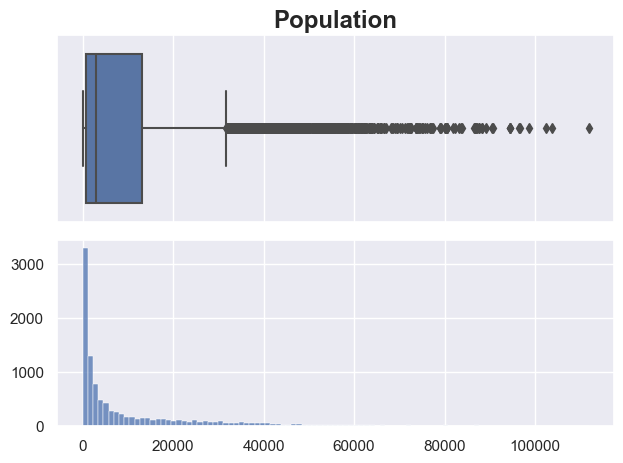

Population # of outliers: 937
     Num high: 937
     Num low: 0

Upper limit for Population: 31,813.00
Lower limit for Population: -17,907.00



(31813.0, -17907.0)

In [31]:
outlier_output_charts(["Population"])

In [32]:
handle_values_dict.update({"Population": "median"})
handle_values_dict

{'Population': 'median'}

Using **retain** for **Children**

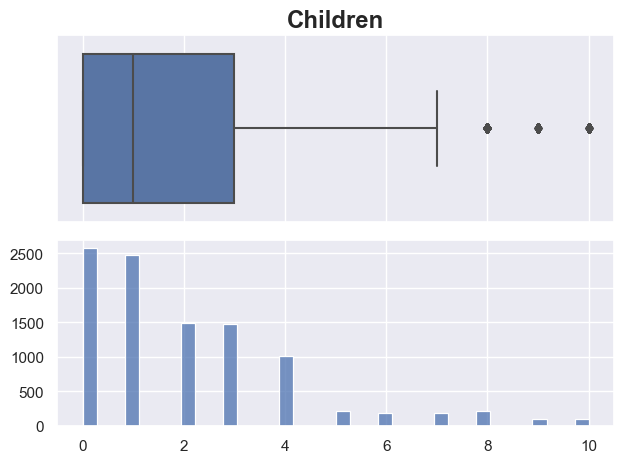

Children # of outliers: 401
     Num high: 401
     Num low: 0

Upper limit for Children: 7.50
Lower limit for Children: -4.50



(7.5, -4.5)

In [33]:
outlier_output_charts(["Children"])

In [34]:
handle_values_dict.update({"Children": "retain"})
handle_values_dict

{'Population': 'median', 'Children': 'retain'}

Using **retain** for **Income**

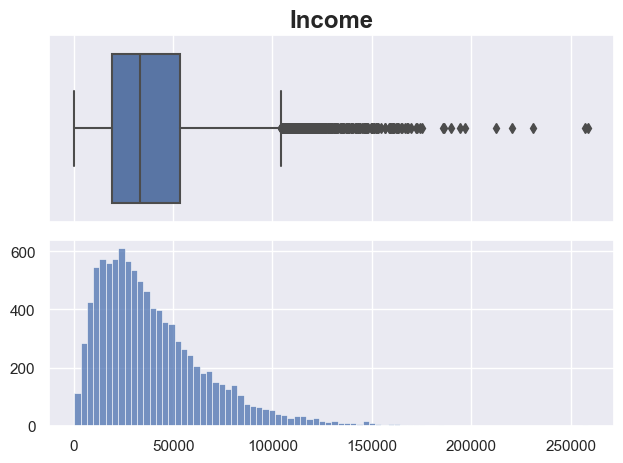

Income # of outliers: 336
     Num high: 336
     Num low: 0

Upper limit for Income: 104,278.35
Lower limit for Income: -31,807.46



(104278.34875, -31807.46125)

In [35]:
outlier_output_charts(["Income"])

In [36]:
handle_values_dict.update({"Income": "retain"})
handle_values_dict

{'Population': 'median', 'Children': 'retain', 'Income': 'retain'}

Using **impute--median** for **Outage_sec_perweek**

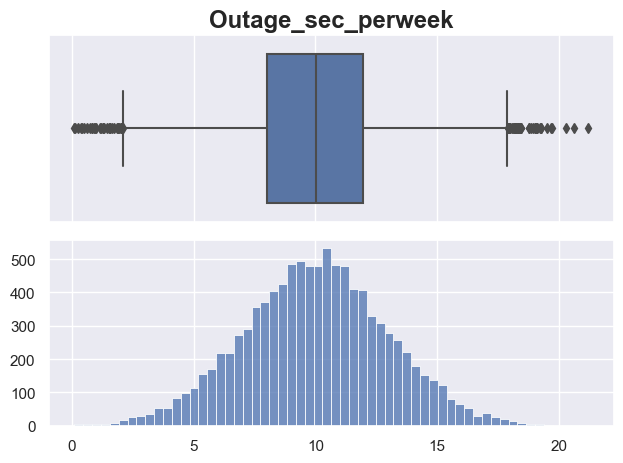

Outage_sec_perweek # of outliers: 76
     Num high: 43
     Num low: 33

Upper limit for Outage_sec_perweek: 17.90
Lower limit for Outage_sec_perweek: 2.09



(17.8963915, 2.0913075)

In [37]:
outlier_output_charts(["Outage_sec_perweek"])

In [38]:
handle_values_dict.update({"Outage_sec_perweek": "median"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median'}

Using **retain** for **Email**

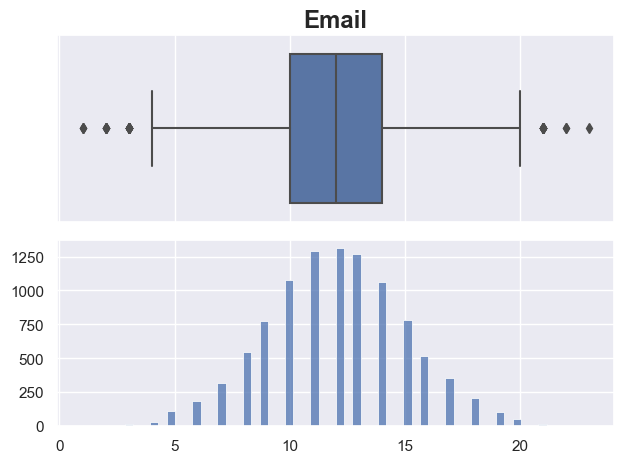

Email # of outliers: 38
     Num high: 15
     Num low: 23

Upper limit for Email: 20.00
Lower limit for Email: 4.00



(20.0, 4.0)

In [39]:
outlier_output_charts(["Email"])

In [40]:
handle_values_dict.update({"Email": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain'}

Using **retain** for **Contacts**

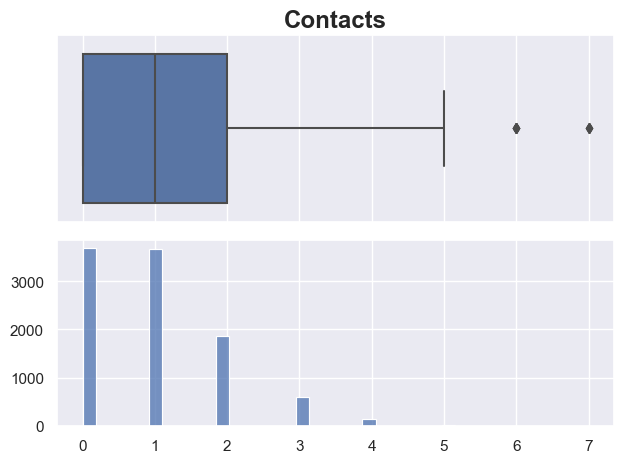

Contacts # of outliers: 8
     Num high: 8
     Num low: 0

Upper limit for Contacts: 5.00
Lower limit for Contacts: -3.00



(5.0, -3.0)

In [41]:
outlier_output_charts(["Contacts"])

In [42]:
handle_values_dict.update({"Contacts": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain'}

Using **retain** for **Yearly_equip_failure**

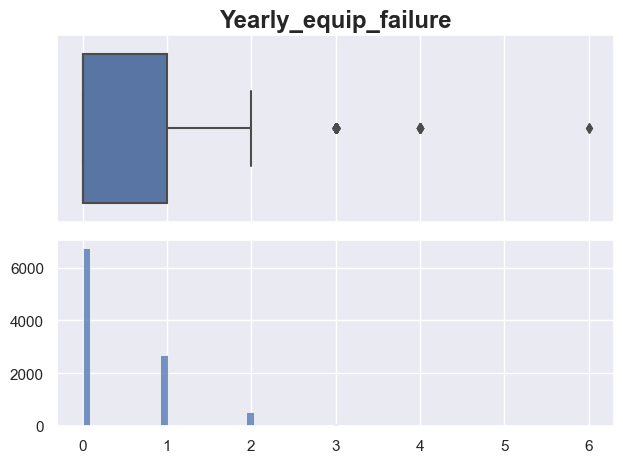

Yearly_equip_failure # of outliers: 94
     Num high: 94
     Num low: 0

Upper limit for Yearly_equip_failure: 2.50
Lower limit for Yearly_equip_failure: -1.50



(2.5, -1.5)

In [43]:
outlier_output_charts(["Yearly_equip_failure"])

In [44]:
handle_values_dict.update({"Yearly_equip_failure": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain'}

Using **retain** for **MonthlyCharge**

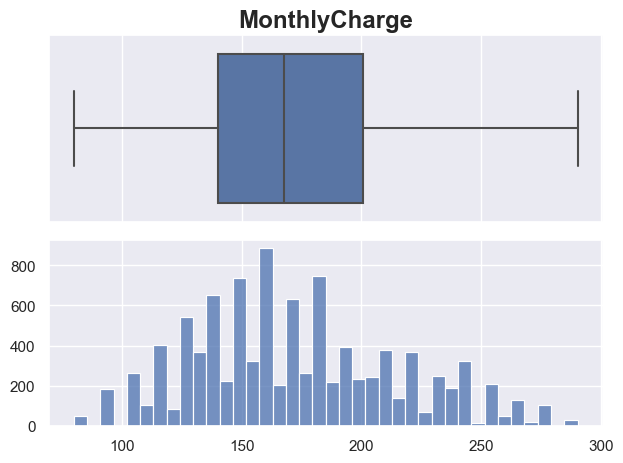

MonthlyCharge # of outliers: 0
     Num high: 0
     Num low: 0

Upper limit for MonthlyCharge: 291.87
Lower limit for MonthlyCharge: 48.85



(291.867954, 48.84601000000002)

In [45]:
outlier_output_charts(["MonthlyCharge"])

In [46]:
handle_values_dict.update({"MonthlyCharge": "retain"})
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain',
 'MonthlyCharge': 'retain'}

In [47]:
handle_values_dict

{'Population': 'median',
 'Children': 'retain',
 'Income': 'retain',
 'Outage_sec_perweek': 'median',
 'Email': 'retain',
 'Contacts': 'retain',
 'Yearly_equip_failure': 'retain',
 'MonthlyCharge': 'retain'}

In [48]:
new_cols_outliers_removed_set = set() # so we can iterate through this as necessary later on

def handle_outliers(handle_values_dict):
    """
    Handles one of the following per column:
        * leaves column be, as outliers have been deemed acceptable to retain
        * creates new column, imputing the outlying data points with the statistical method chosen by user while retaining all non-outlier values
        * excludes entire row outlier belongs to; removes said row from main df and puts it into a new df
        * removes entire row outlier belongs to from main df
    
    Args:
        * handle_values_dict (dict):
            * Before running this function, create a dict with all columns that have outliers you want to handle.
            * You will have to make a judgement call as to which of the following you want to do:
                * "retain" -- does not change any data within the col
                * "mean" -- imputes mean value from col
                * "median" -- imputes median value from col
                * "mode" -- imputes mode from col
                * "exclude" -- removes row from main df to a separate df
                * "remove" -- removes row from main df completely
          
        * Make sure that you are using the "no_nulls" col if there is both an original and modified col
            
    """

    df_exclude = pd.DataFrame()

    for k, v in handle_values_dict.items():
        addnl_col = k + "_with_outliers"
        v = v.lower()
                
        condition = df.index.isin(outlier_dict[k]["Rows With Outliers"]) 
        
        if v == "retain":
            continue # no change to df since we're keeping everything
        
        if v == "mean" or v == "median":
            s_test = getattr(df[k], v) # need to do this since test is being passed as a kwarg # tip of the cap to https://stackoverflow.com/questions/31112742/why-should-i-ever-use-getattr
            s_test_val = s_test() # in order to actually create an instance of median() or mean()

            df_orphans[addnl_col] = df[k] # create new col in df_orphans and move over data with outliers to it # tip of the cap to https://datagy.io/pandas-conditional-column/ for using df.loc[] and conditions
            
            df.loc[condition, k] = s_test_val # fill in any outliers found within col with mean/median as specified in function call
            
            new_cols_outliers_removed_set.add(addnl_col) # add to set to keep track of outlier cols created
            
        if v == "exclude":
            excluded_rows = df.loc[condition].copy() # grab all rows that fit condition above since they will be added to df_orphans, then 
            
            df_exclude = pd.concat([df_exclude, excluded_rows]) # tip of the cap to https://stackoverflow.com/questions/67139564/concatenate-dataframe-in-pandas
            df.drop(index=excluded_rows.index, inplace=True)

        if v == "remove":
            df.drop(index = df.loc[condition].index, inplace=True) # delete inplace
   
    return df_exclude # we'll be able to see this upon output, and we can assign the funciton call to a variable as desired

In [49]:
#function call
df_exclude = handle_outliers(handle_values_dict)
df_exclude

""


In [50]:
# handle_values_dict
outlier_dict

{'Population': {'IQR': 12430.0,
  'Lower Limit (Q1 * -1.5)': -17907.0,
  'Upper Limit (Q3 * 1.5)': 31813.0,
  'Rows With Outliers': [12,
   17,
   30,
   45,
   52,
   57,
   58,
   67,
   75,
   86,
   88,
   91,
   101,
   103,
   111,
   121,
   124,
   142,
   157,
   158,
   164,
   172,
   204,
   213,
   216,
   218,
   232,
   241,
   242,
   257,
   258,
   260,
   263,
   276,
   286,
   292,
   315,
   324,
   352,
   353,
   361,
   373,
   380,
   385,
   386,
   395,
   427,
   433,
   437,
   442,
   443,
   446,
   465,
   469,
   499,
   529,
   530,
   556,
   559,
   578,
   588,
   590,
   593,
   599,
   605,
   622,
   645,
   647,
   656,
   663,
   739,
   741,
   745,
   748,
   772,
   775,
   780,
   802,
   822,
   830,
   837,
   838,
   852,
   856,
   870,
   891,
   898,
   907,
   970,
   986,
   991,
   1002,
   1044,
   1086,
   1097,
   1108,
   1114,
   1132,
   1151,
   1157,
   1160,
   1163,
   1174,
   1187,
   1192,
   1196,
   1212,
   1219,
 

In [51]:
df_orphans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Population_with_outliers          10000 non-null  int64  
 1   Outage_sec_perweek_with_outliers  10000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.4 KB


In [52]:
cols_with_missing_values_list

['InternetService']

In [53]:
cols_with_outliers

{'Children',
 'Contacts',
 'Email',
 'Income',
 'Outage_sec_perweek',
 'Population',
 'Yearly_equip_failure'}

In [54]:
cols_handled = set(cols_with_missing_values_list).union(cols_with_outliers)
cols_handled

{'Children',
 'Contacts',
 'Email',
 'Income',
 'InternetService',
 'Outage_sec_perweek',
 'Population',
 'Yearly_equip_failure'}

In [55]:
df_orphans[sorted(df_orphans.columns.tolist())].info() # tip of the cap to https://learnpython.com/blog/sort-alphabetically-in-python/

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Outage_sec_perweek_with_outliers  10000 non-null  float64
 1   Population_with_outliers          10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 234.4 KB


In [56]:
new_cols_outliers_removed_set

{'Outage_sec_perweek_with_outliers', 'Population_with_outliers'}

In [57]:
final_viz_dict = {}

for col_base in set(df.columns.tolist()):
    
    if col_base not in quant_cols:
        continue
    
    if col_base + "_with_nulls" in new_cols_nulls_removed_set:
        col_null = col_base + "_with_nulls"
        
        if col_base not in final_viz_dict:
            final_viz_dict[col_base] = [col_null]
        else:
            final_viz_dict[col_base].append(col_null)
        
    if col_base + "_with_outliers" in new_cols_outliers_removed_set:
        col_out = col_base + "_with_outliers"
        
        if col_base not in final_viz_dict:
            final_viz_dict[col_base] = [col_out]
        
        else:
            final_viz_dict[col_base].append(col_out)            


In [58]:
# all of the original quantitative columns
quant_cols

['Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [59]:
# the columns that we ended up handling nulls and/or outliers in
final_viz_dict

{'Population': ['Population_with_outliers'],
 'Outage_sec_perweek': ['Outage_sec_perweek_with_outliers']}

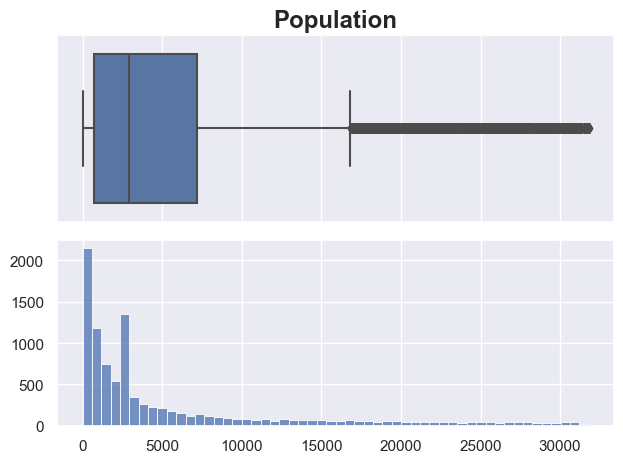

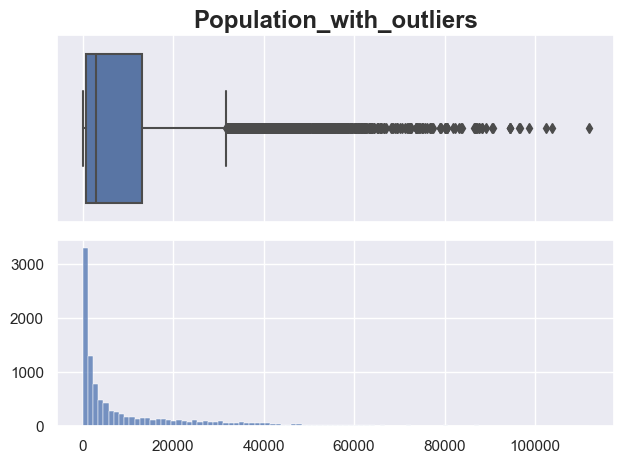

               Original median value: 2910.5
               Cleaned median value: 2909.75



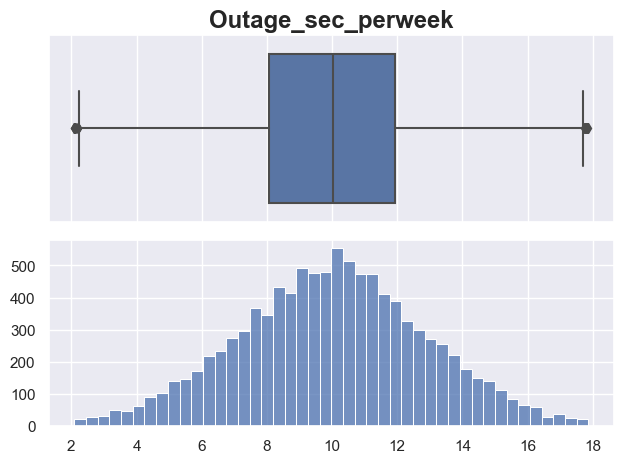

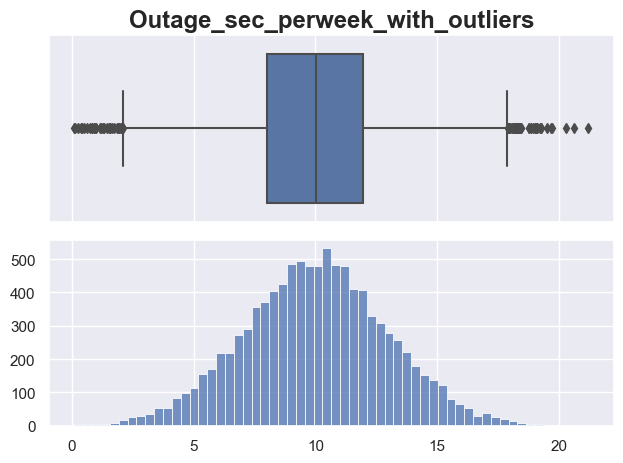

               Original median value: 10.01856
               Cleaned median value: 10.01856



In [60]:
for k, val in final_viz_dict.items():
    for v in val:    
        create_charts([k])
        create_charts(val, df=df_orphans)
    
        print(f'               Original median value: {df_orphans[[v]].describe().loc[["50%"]].iloc[0,0]}') # tip of the cap to https://www.statology.org/pandas-describe-only-mean-std/
        print(f'               Cleaned median value: {df[[k]].describe().loc[["50%"]].iloc[0,0]}')
        print("")

In [61]:
df.to_csv("C:/Users/nick_/_WGU/D207/Jupyter Notebook/churn_data_clean_parker.csv")
print("Successfully saved to CSV")

Successfully saved to CSV


## End cleaning data, now on to D207 portion of code

## B1

### *Is there a difference in average price of internet for urban customers and rural customers?*


In [62]:
from scipy import stats
from matplotlib.ticker import StrMethodFormatter

In [63]:
df.head(1)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,38.0,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.53611,5,5,5,3,4,4,3,4


In [64]:
df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49153.319600,38.757567,-90.782536,5721.033050,2.0877,53.078400,39806.926771,9.993466,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,27532.196108,5.437389,15.156142,7541.829344,2.1472,20.698882,28199.916702,2.876486,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,2.094319,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.051814,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,48869.500000,39.395800,-87.918800,2909.750000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,71866.500000,42.106908,-80.088745,7177.750000,3.0000,71.000000,53246.170000,11.928072,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.640660,-65.667850,31795.000000,10.0000,89.000000,258900.700000,17.861530,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  float64
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [66]:
df_fiber_optic = df.loc[df["InternetService"] == "Fiber Optic"]

In [67]:
df_dsl = df.loc[df["InternetService"] == "DSL"]

In [68]:
df_no_internet = df.loc[df["InternetService"] == "None"]

In [69]:
fiber_optic_array = df[df["InternetService"] == "Fiber Optic"]["MonthlyCharge"]
dsl_array = df[df["InternetService"] == "DSL"]["MonthlyCharge"]
no_internet_array = df[df["InternetService"] == "None"]["MonthlyCharge"]

In [70]:
anova = stats.f_oneway(fiber_optic_array, dsl_array, no_internet_array)

C:\Users\nick_\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


## B2

In [71]:
anova

F_onewayResult(statistic=nan, pvalue=nan)

In [72]:
print(anova[1])

nan


In [73]:
df_fiber_optic["MonthlyCharge"].describe().loc["mean"]

186.48640135957353

In [74]:
df_dsl["MonthlyCharge"].describe().loc["mean"]

167.0555698099913

In [75]:
df_no_internet["MonthlyCharge"].describe().loc["mean"]

nan

## C1--Univariate Statistics

### Continuous Variables

#### Age

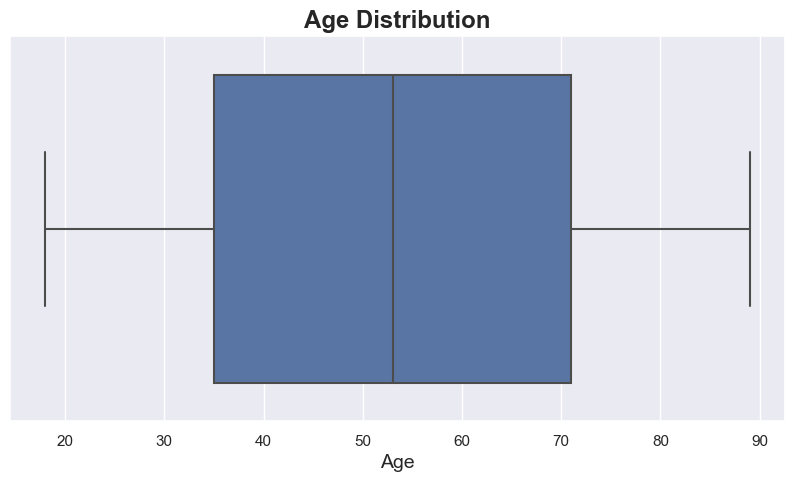

In [76]:
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x=df["Age"])

ax.set_title(label="Age Distribution", fontsize="x-large", weight="bold")
ax.set_xlabel("Age", fontsize=14)

plt.show()

#### Income

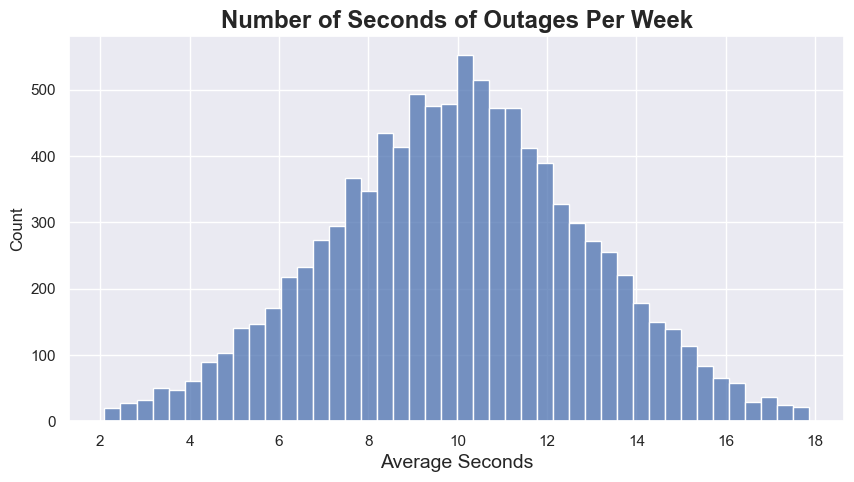

In [77]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(x=df["Outage_sec_perweek"])

ax.set_title(label="Number of Seconds of Outages Per Week", fontsize="x-large", weight="bold")
ax.set_xlabel("Average Seconds", fontsize=14)

plt.show()

### Categorical Variables

#### Area

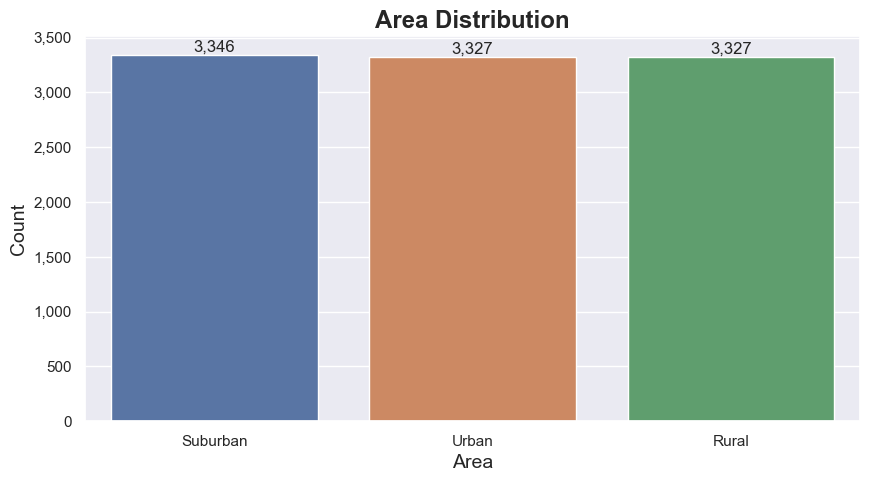

In [78]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=df, y=df["Area"].value_counts(), x=df["Area"].value_counts().index)

ax.set_title(label="Area Distribution", fontsize="x-large", weight="bold")
ax.set_xlabel("Area", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

for a in ax.containers: # tip of the hat to https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/#
    ax.bar_label(a, fmt="{}", labels=[f"{val:,.0f}" for val in a.datavalues]) # tip of the cap to https://stackoverflow.com/questions/70515542/adding-comma-to-bar-labels


plt.show()

#### Contract

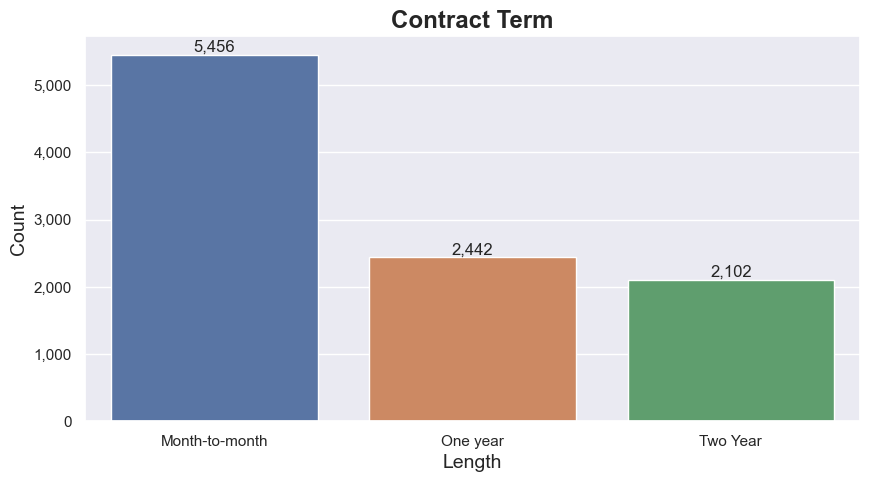

In [79]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=df, 
    y=df["Contract"].value_counts(), 
    x=df["Contract"].value_counts().sort_index().index
   )

ax.set_title(label="Contract Term", fontsize="x-large", weight="bold")
ax.set_xlabel("Length", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

for a in ax.containers: # tip of the hat to https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/#
    ax.bar_label(a, fmt="{}", labels=[f"{val:,.0f}" for val in a.datavalues]) # tip of the cap to https://stackoverflow.com/questions/70515542/adding-comma-to-bar-labels

plt.show()

## D1--Bivariate Statistics

### Categorical--_InternetService_ and _Gender_

In [80]:
# use .groupby() to create a df with the information we need to plot two categorical variables
df_ser_gen = df.groupby(["InternetService", "Gender"]).agg(occurences=("Customer_id", "count")) # tip of the cap to https://linuxhint.com/seaborn-barplot-multiple-columns/
df_ser_gen = df_ser_gen.reset_index() # if you don't .reset_index() you'll get a multi-level df and that's a pain
# df_ser_gen

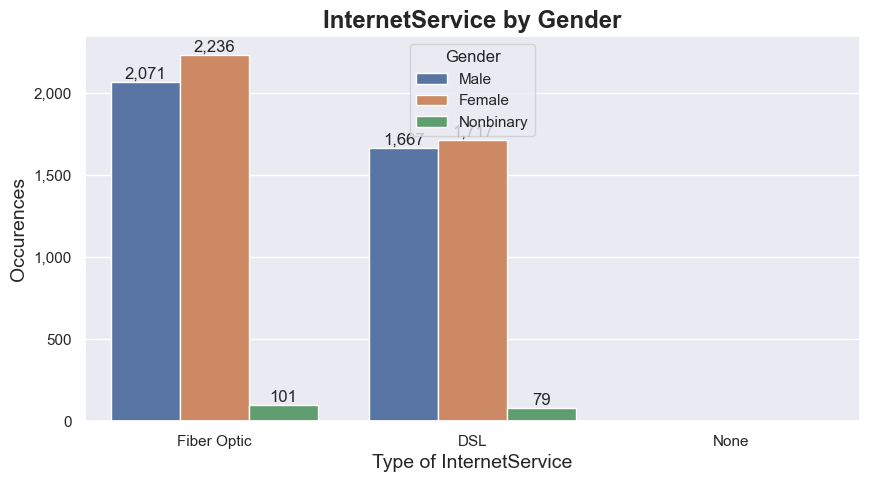

In [81]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(
    data=df_ser_gen,
    x="InternetService", 
    y="occurences",
    hue="Gender",
    order=["Fiber Optic", "DSL", "None"],
    hue_order=["Male", "Female", "Nonbinary"] # tip of the cap to https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/#
   )

ax.set_title(label="InternetService by Gender", fontsize="x-large", weight="bold")
ax.set_xlabel("Type of InternetService", fontsize=14)
ax.set_ylabel("Occurences", fontsize=14)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


# for a in ax.containers: # tip of the hat to https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/#
#     ax.bar_label(a,fmt="{x:,.0f}") ## this is how to do it in v 3.7+ in MPL, I'm using an older version

for a in ax.containers: # tip of the hat to https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/#
    ax.bar_label(a, fmt="{}", labels=[f"{val:,.0f}" for val in a.datavalues]) # tip of the cap to https://stackoverflow.com/questions/70515542/adding-comma-to-bar-labels


plt.show()

## Continual--_Tenure_ and _Bandwidth_GB_Year_

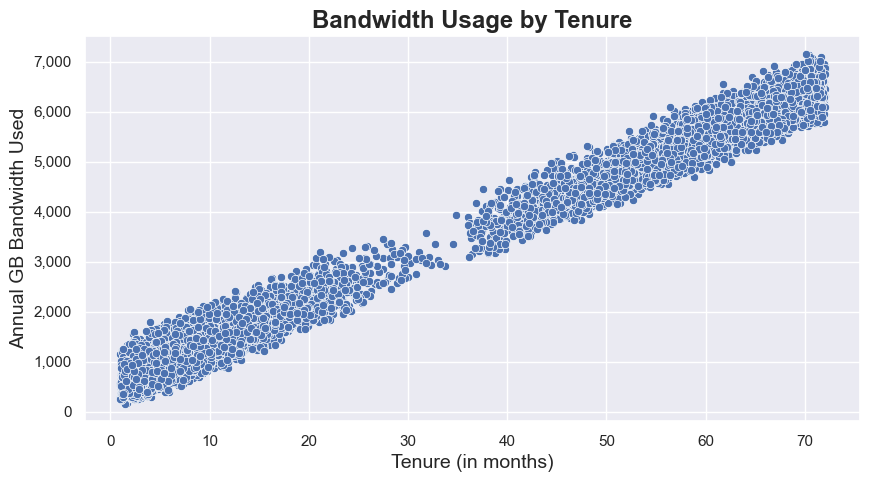

In [82]:
fig, ax = plt.subplots(figsize=(10,5))


sns.scatterplot(data=df, x=df["Tenure"], y=df["Bandwidth_GB_Year"])

ax.set_title(label="Bandwidth Usage by Tenure", fontsize="x-large", weight="bold")
ax.set_xlabel("Tenure (in months)", fontsize=14)
ax.set_ylabel("Annual GB Bandwidth Used", fontsize=14)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # my brow has stopped twitching thanks to https://stackoverflow.com/a/46574866

plt.show()